In [1]:
import qiskit
from qiskit.providers import BaseBackend
from qiskit.providers.ibmq import IBMQBackend

In [2]:
import numpy as np

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris

X, y = load_iris(True)
X = np.asarray([x[0:2] for x, y in zip(X, y) if y != 2])
y = np.asarray([y for x, y in zip(X, y) if y != 2])

preprocessing_pipeline = Pipeline([
    ('scaler',  StandardScaler()), 
    ('l2norm', Normalizer(norm='l2', copy=True))
])
X = preprocessing_pipeline.fit_transform(X, y)

X_train = X[[33, 85]]
y_train = y[[33, 85]]

X_test = X[[28, 36]]
y_test = y[[28, 36]]

In [3]:
import matplotlib.pyplot as plt

plt.scatter(
    X[:,0], X[:,1], 
    color=['red' if yy == 0 else 'blue' for yy in y])
plt.scatter(
    X_train[:,0], X_train[:,1], 
    color=['red' if yy == 0 else 'blue' for yy in y_train],
    marker='x', s=200)
plt.scatter(
    X_test[:,0], X_test[:,1], 
    color=['red' if yy == 0 else 'blue' for yy in y_test],
    marker='o', s=200)
plt.show()

In [4]:
X_train, y_train, X_test, y_test

(array([[0.01944862, 0.99981086],
        [0.78861006, 0.61489363]]),
 array([0, 1]),
 array([[-0.54910383,  0.83575414],
        [ 0.0529165 ,  0.99859894]]),
 array([0, 0]))

In [5]:
from dc_qiskit_qml.feature_maps import NormedAmplitudeEncoding
from dc_qiskit_qml.distance_based.hadamard import QmlHadamardNeighborClassifier
from dc_qiskit_qml.distance_based.hadamard.state import QmlGenericStateCircuitBuilder
from dc_qiskit_qml.distance_based.hadamard.state.sparsevector import MöttönenStatePreparation

initial_state_builder = QmlGenericStateCircuitBuilder(MöttönenStatePreparation())

execution_backend: BaseBackend = qiskit.Aer.get_backend('qasm_simulator')
qml = QmlHadamardNeighborClassifier(backend=execution_backend,
                                    shots=8192, 
                                    classifier_circuit_factory=initial_state_builder,
                                    feature_map=NormedAmplitudeEncoding())

In [6]:
qml.fit(X_train, y_train)

In [7]:
qml.predict(X_test), y_test

([0, 0], array([0, 0]))

In [8]:
print(qml._last_predict_circuits[0].qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg ancilla[1];
qreg index[1];
qreg data[1];
qreg qlabel[1];
creg clabel[1];
creg branch[1];
ry(1.57079632679490) qlabel[0];
cx qlabel[0],data[0];
ry(0.348047809706910) data[0];
cx qlabel[0],data[0];
ry(1.99549834761941) data[0];
cx qlabel[0],index[0];
ry(-1.57079632679490) index[0];
cx data[0],index[0];
ry(0) index[0];
cx qlabel[0],index[0];
ry(0) index[0];
cx data[0],index[0];
ry(1.57079632679490) index[0];
cx qlabel[0],ancilla[0];
ry(-0.171732327270003) ancilla[0];
cx index[0],ancilla[0];
ry(0.626703345291896) ancilla[0];
cx data[0],ancilla[0];
ry(-0.127720088341437) ancilla[0];
cx index[0],ancilla[0];
ry(-0.291846890739959) ancilla[0];
cx qlabel[0],ancilla[0];
ry(-0.127720088341437) ancilla[0];
cx index[0],ancilla[0];
ry(-0.291846890739959) ancilla[0];
cx data[0],ancilla[0];
ry(-0.171732327270003) ancilla[0];
cx index[0],ancilla[0];
ry(0.626703345291896) ancilla[0];
cx qlabel[0],data[0];
rz(0) data[0];
cx qlabel[0],data[0];
rz(-0.785398163397448

# Now a lot more data

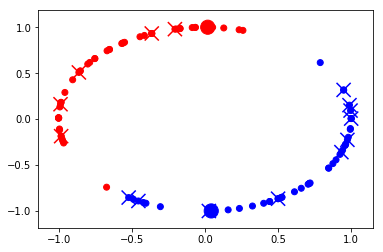

In [9]:
X_train = X[45:60]
y_train = y[45:60]

X_test = X[[33, 90]]
y_test = y[[33, 90]]

plt.scatter(
    X[:,0], X[:,1], 
    color=['red' if yy == 0 else 'blue' for yy in y])
plt.scatter(
    X_train[:,0], X_train[:,1], 
    color=['red' if yy == 0 else 'blue' for yy in y_train],
    marker='x', s=200)
plt.scatter(
    X_test[:,0], X_test[:,1], 
    color=['red' if yy == 0 else 'blue' for yy in y_test],
    marker='o', s=200)
plt.show()

In [10]:
qml.fit(X, y)

In [11]:
qml.predict(X_test), y_test

([0, 1], array([0, 1]))

In [12]:
print(qml._last_predict_circuits[0].qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg ancilla[1];
qreg index[7];
qreg data[1];
qreg qlabel[1];
creg clabel[1];
creg branch[1];
ry(1.28700221758657) qlabel[0];
cx qlabel[0],data[0];
ry(0.445561253943326) data[0];
cx qlabel[0],data[0];
ry(1.12523507285157) data[0];
cx qlabel[0],index[6];
ry(0.392699081698724) index[6];
cx data[0],index[6];
ry(-0.392699081698724) index[6];
cx qlabel[0],index[6];
ry(0.392699081698724) index[6];
cx data[0],index[6];
ry(1.17809724509617) index[6];
cx qlabel[0],index[5];
ry(0.392699081698724) index[5];
cx index[6],index[5];
ry(0) index[5];
cx data[0],index[5];
ry(0) index[5];
cx index[6],index[5];
ry(-0.392699081698724) index[5];
cx qlabel[0],index[5];
ry(0.392699081698724) index[5];
cx index[6],index[5];
ry(0) index[5];
cx data[0],index[5];
ry(0) index[5];
cx index[6],index[5];
ry(1.17809724509617) index[5];
cx qlabel[0],index[4];
ry(0.392699081698724) index[4];
cx index[5],index[4];
ry(0) index[4];
cx index[6],index[4];
ry(0) index[4];
cx index[5],index[